In [120]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [121]:
# Read the City Data
city_data = pd.read_csv(city_data_to_load)
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [122]:
# Read the Ride Data
ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [123]:
# Combine the data into a single dataset
city_data_df = pd.merge(city_data, ride_data,
                                 how='outer', on='city')
# Display the data table for preview
city_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [148]:
# Urban Calcs
# loc onto Urban type
urban_data = city_data_df.loc[city_data_df['type'] == "Urban"]
# Following loc grouping to city and calculating average fare, total fares and # of rides
urban_city_group = urban_data.groupby(["city"])
urban_average_fare = urban_city_group["fare"].mean()
urban_total_fares = urban_city_group["fare"].sum()
urban_rides_per_city = urban_city_group["driver_count"].count()
urban_rider_count = urban_city_group["driver_count"].mean()

# Creating DataFrame to check data
urban_city_df = pd.DataFrame({"Average Fare" : urban_average_fare, "Total Fares" : urban_total_fares, "# of rides" : 
                              urban_rides_per_city,"Driver Count" : urban_rider_count})

urban_city_df.head()

,Average Fare,Total Fares,# of rides,Driver Count
city,,,,
Amandaburgh,24.641667,443.55,18,12
Barajasview,25.332273,557.31,22,26
Carriemouth,28.314444,764.49,27,52
Christopherfurt,24.501852,661.55,27,41
Deanville,25.842632,491.01,19,49


In [140]:
# Suburban Calcs
suburban_data = city_data_df.loc[city_data_df['type'] == "Suburban"]
# Following loc grouping to city and calculating average fare, total fares and # of rides
suburban_city_group = suburban_data.groupby(["city"])
suburban_average_fare = suburban_city_group["fare"].mean()
suburban_total_fares = suburban_city_group["fare"].sum()
suburban_rides_per_city = suburban_city_group["driver_count"].count()
suburban_rider_count = suburban_city_group["driver_count"].mean()
# Creating DataFrame to check data
suburban_city_df = pd.DataFrame({"Average Fare" : suburban_average_fare, "Total Fares" : suburban_total_fares, "# of rides" : 
                              suburban_rides_per_city,"Driver Count" : suburban_rider_count})

suburban_city_df.head()

,Average Fare,Total Fares,# of rides,Driver Count
city,,,,
Barronchester,36.422500,582.76,16,11
Bethanyland,32.956111,593.21,18,22
Brandonfort,35.437368,673.31,19,10
Colemanland,30.894545,679.68,22,23
Davidfurt,31.995882,543.93,17,23


In [141]:
# Loc Dataframe by Rural
rural_data = city_data_df.loc[city_data_df['type'] == "Rural"]
# Following loc grouping to city and calculating average fare, total fares and # of rides
rural_city_group = rural_data.groupby(["city"])
rural_average_fare = rural_city_group["fare"].mean()
rural_total_fares = rural_city_group["fare"].sum()
rural_rides_per_city = rural_city_group["driver_count"].count()
rural_rider_count = rural_city_group["driver_count"].mean()
# Creating DataFrame to check data
rural_city_df = pd.DataFrame({"Average Fare" : rural_average_fare, "Total Fares" : rural_total_fares, "# of rides" : 
                              rural_rides_per_city,"Driver Count" : rural_rider_count})

rural_city_df.head()

,Average Fare,Total Fares,# of rides,Driver Count
city,,,,
Bradshawfurt,40.064000,400.64,10,7
Garzaport,24.123333,72.37,3,7
Harringtonfort,33.470000,200.82,6,4
Jessicaport,36.013333,216.08,6,1
Lake Jamie,34.358333,206.15,6,4


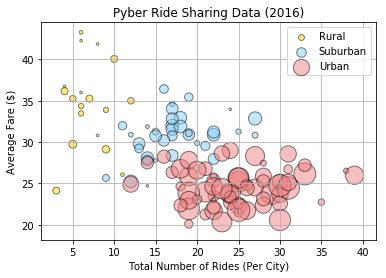

In [142]:
# Titles, grid and labels
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Creating Scatterplots
plt.scatter(rural_rides_per_city, rural_average_fare, label = "Rural", marker="o",  s=rural_rider_count*7, alpha=0.5, edgecolor="black", linewidth=1, color="Gold")
plt.scatter(suburban_rides_per_city, suburban_average_fare, label = "Suburban", marker="o", s=suburban_rider_count*7, alpha=0.5, edgecolor="black", linewidth=1, color="LightSkyBlue")
plt.scatter(urban_rides_per_city, urban_average_fare, label = "Urban", marker="o", s=urban_rider_count*7, alpha=0.5, edgecolor="black", linewidth=1, color="LightCoral")
plt.legend(loc ="best")
# Saving file
plt.savefig("../Images/Pyber_Scatter.png")



In [143]:
# Creating Dataframe by City Type
city_type_group = city_data_df.groupby(["type"])
city_type_group.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
1625,Port Shane,7,Suburban,2018-04-09 15:34:40,27.66,4022340141966
1626,Port Shane,7,Suburban,2018-04-23 16:05:47,42.26,8341982666719
1627,Port Shane,7,Suburban,2018-03-02 12:06:00,14.95,2803204948363
1628,Port Shane,7,Suburban,2018-03-26 04:33:30,19.03,6010401984537
1629,Port Shane,7,Suburban,2018-03-15 12:09:42,31.58,2552978514662


## Total Fares by City Type

In [144]:
# Calculateing total fares percents by type 
fares_type = pd.DataFrame(city_type_group["fare"].sum())
fares_type["% Of Fares by City Type"] = fares_type / Total_Fares * 100
fares_type_rename = fares_type.rename(columns={"fare": "Total Fares"})

fares_type_rename.head()


,Total Fares,% Of Fares by City Type
type,,
Rural,4327.93,6.811493
Suburban,19356.33,30.463872
Urban,39854.38,62.724635


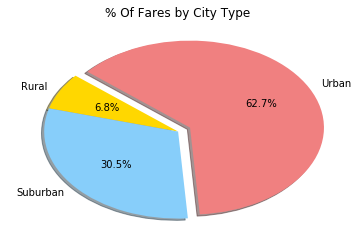

In [145]:
# Creat colors of each section of the pie chart and labels
colors = ["Gold", "LightSkyBlue", "LightCoral"]
fares_pie = fares_type_rename["% Of Fares by City Type"]
labels = ["Rural", "Suburban", "Urban"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, .1)

# Creating pie Chart
plt.pie(fares_pie, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% Of Fares by City Type")

# Save Figure
plt.savefig("../Images/% Of Fares by City Type_Pie.png")


## Total Rides by City Type

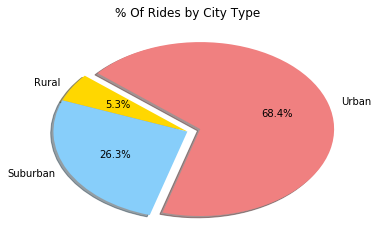

In [146]:
# Calculate Ride Percents
total_rides_type = pd.DataFrame(city_type_group["city"].count())
total_rides_type["% Of Rides by City Type"] = total_rides_type / Total_Rides * 100
total_rides_type_rename = total_rides_type.rename(columns={"city": "Total Rides"}) 

# The colors of each section of the pie chart and labels
colors = ["Gold", "LightSkyBlue", "LightCoral"]
rides_pie = total_rides_type_rename["% Of Rides by City Type"]
labels = ["Rural", "Suburban", "Urban"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, .1)

# Creating pie chart
plt.pie(rides_pie, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% Of Rides by City Type")

# Save Figure
plt.savefig("../Images/% Of Rides by City Type_Pie.png")


## Total Drivers by City Type

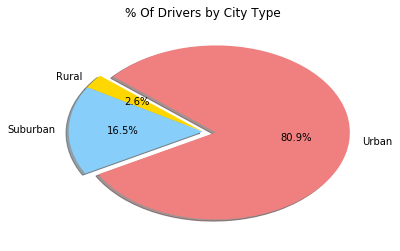

In [147]:
# Calculate Driver Percents
drivers_type_group = City_df.groupby(["type"])
total_drivers = City_df["Driver Count"].sum()
total_driver_type = pd.DataFrame(drivers_type_group["Driver Count"].sum())
total_driver_type["% Of Drivers by City Type"] = total_driver_type / total_drivers * 100

# The colors of each section of the pie chart and labels
colors = ["Gold", "LightSkyBlue", "LightCoral"]
drivers_pie = total_driver_type["% Of Drivers by City Type"]
labels = ["Rural", "Suburban", "Urban"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, .1)

# Creating pie chart
plt.pie(drivers_pie, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% Of Drivers by City Type")

# Save Figure
plt.savefig("../Images/% Of Drivers by City Type_Pie.png")
